# Dean Property Consulting 2024

## EDA

### Imports

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Begin EDA

In [146]:
# read in dataset
df=pd.read_csv('../data/230000 RE Transfers 2010-2023 PROGRESS SORTED 2.csv',low_memory=False)

In [147]:
# peek at a sample
df.sample(5)

,Unnamed: 0,DATE,NEIGBORHOOD,No.,STREET,ZIP,SALE / ASK,WEB,RENT ROLL,UNITS,...,TAX,BEDS,BATHS,WEEKS,TELEPHONE,CONTACT,AGENCY,ANNUAL $,30yr,ZONING
7207,NaN,01/07/2015,NaN,500,Clinton Ave,11238,"$2,350,000.00",NaN,NaN,8,...,NaN,NaN,NaN,12,PropertyShark,NaN,NaN,"$71,786.00",3.97%,C2-4/R6A
33121,NaN,12/21/2021,NaN,1631,West 13th St,11223,"$1,650,000.00","1631 W 13th St, Brooklyn, 11223",NaN,3,...,NaN,NaN,NaN,NaN,PropertyShark,NaN,NaN,"$39,069.00",3.05%,R4-1
19374,NaN,02/27/2018,NaN,1144,66th St,11219,"$699,000.00",NaN,#101,1,...,NaN,NaN,NaN,NaN,PropertyShark,NaN,NaN,"$23,568.00",4.40%,R5B
8981,NaN,06/11/2015,NaN,29,Cambridge Pl,11238,"$2,825,000.00",NaN,NaN,3,...,NaN,NaN,NaN,12,PropertyShark,NaN,NaN,"$86,505.00",3.98%,R6B
3938,NaN,02/18/2014,NaN,786,Madison St,11221,"$384,641.00",NaN,#4A,1,...,NaN,NaN,NaN,12,PropertyShark,NaN,NaN,"$13,025.00",4.42%,NaN


In [148]:
df.tail(10)

,Unnamed: 0,DATE,NEIGBORHOOD,No.,STREET,ZIP,SALE / ASK,WEB,RENT ROLL,UNITS,...,TAX,BEDS,BATHS,WEEKS,TELEPHONE,CONTACT,AGENCY,ANNUAL $,30yr,ZONING
40681,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$690,000.00","1670 73rd St, Brooklyn, 11204",NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$35,871.00",6.95%,R5
40682,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$850,000.00","7415 Tenth Ave #1C, Brooklyn, 11228",NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$44,189.00",6.95%,R5B
40683,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$1,120,000.00","168 Bleecker St, Brooklyn, 11221",NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$58,225.00",6.95%,R6
40684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN


In [149]:
# remove the bottom 7 rows as they're blank data
df=df[:-7]
df.tail()

,Unnamed: 0,DATE,NEIGBORHOOD,No.,STREET,ZIP,SALE / ASK,WEB,RENT ROLL,UNITS,...,TAX,BEDS,BATHS,WEEKS,TELEPHONE,CONTACT,AGENCY,ANNUAL $,30yr,ZONING
40679,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$470,000.00","752 Rutland Rd, Brooklyn, 11203",NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$24,434.00",6.95%,R6
40680,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$2,220,000.00","722 Chauncey St, Brooklyn, 11207",NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$115,411.00",6.95%,R6
40681,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$690,000.00","1670 73rd St, Brooklyn, 11204",NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$35,871.00",6.95%,R5
40682,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$850,000.00","7415 Tenth Ave #1C, Brooklyn, 11228",NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$44,189.00",6.95%,R5B
40683,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$1,120,000.00","168 Bleecker St, Brooklyn, 11221",NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$58,225.00",6.95%,R6


In [150]:
# check information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40684 entries, 0 to 40683
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   187 non-null    object 
 1   DATE         40684 non-null  object 
 2   NEIGBORHOOD  1753 non-null   object 
 3   No.          33735 non-null  object 
 4   STREET       33735 non-null  object 
 5   ZIP          33405 non-null  object 
 6   SALE / ASK   40682 non-null  object 
 7   WEB          17352 non-null  object 
 8   RENT ROLL    7548 non-null   object 
 9   UNITS        40656 non-null  object 
 10  FLOORS       40675 non-null  object 
 11  LEGAL        39920 non-null  object 
 12  STRUCTURE    20986 non-null  object 
 13  C            927 non-null    object 
 14  LOT 1        28936 non-null  object 
 15  LOT 2        34403 non-null  object 
 16  SF           40670 non-null  object 
 17  $/SF         39776 non-null  object 
 18  SF/FLOOR     39619 non-null  object 
 19  $/FL

Convert some columns to appropriate data types.

In [151]:
# convert date column to correct format
df['DATE']=pd.to_datetime(df['DATE'])

# SALE / ASK column
# remove dollar symbol 
# convert to number data type
df['SALE / ASK']=df['SALE / ASK'].str.replace(r'[\$,]', '', regex=True)
df['SALE / ASK']=df['SALE / ASK'].astype('float64')

# recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40684 entries, 0 to 40683
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   187 non-null    object        
 1   DATE         40684 non-null  datetime64[ns]
 2   NEIGBORHOOD  1753 non-null   object        
 3   No.          33735 non-null  object        
 4   STREET       33735 non-null  object        
 5   ZIP          33405 non-null  object        
 6   SALE / ASK   40682 non-null  float64       
 7   WEB          17352 non-null  object        
 8   RENT ROLL    7548 non-null   object        
 9   UNITS        40656 non-null  object        
 10  FLOORS       40675 non-null  object        
 11  LEGAL        39920 non-null  object        
 12  STRUCTURE    20986 non-null  object        
 13  C            927 non-null    object        
 14  LOT 1        28936 non-null  object        
 15  LOT 2        34403 non-null  object        
 16  SF  

In [152]:
# quick statistical information
# this will throw error
# but we can still have a look
df['DATE'].describe()

/var/folders/n3/q8wb235x57n_sx2q14dsngjr0000gn/T/ipykernel_40139/550326953.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['DATE'].describe()


count                   40684
unique                   2914
top       2012-01-12 00:00:00
freq                       97
first     2010-01-03 00:00:00
last      2023-12-14 00:00:00
Name: DATE, dtype: object

In [153]:
# curious about the Unnamed column
df['Unnamed: 0'].value_counts()

A    78
O    50
P    45
X    11
C     3
Name: Unnamed: 0, dtype: int64

The `Unnamed` column is something to talk about with the client as it may represent domain-specific knowledge.

In [154]:
df['SALE / ASK'].describe()

count    4.068200e+04
mean     1.405476e+06
std      1.635294e+06
min      0.000000e+00
25%      7.500000e+05
50%      1.100000e+06
75%      1.625000e+06
max      1.020000e+08
Name: SALE / ASK, dtype: float64

In [155]:
df['SALE / ASK'].value_counts()

1200000.0    613
1300000.0    558
1100000.0    525
1250000.0    434
950000.0     431
            ... 
1537609.0      1
1494000.0      1
415200.0       1
6129000.0      1
1366000.0      1
Name: SALE / ASK, Length: 5593, dtype: int64

In [156]:
(df['SALE / ASK'].isna().sum()/df['SALE / ASK'].count())*100

0.004916179145568064

In [157]:
df[df['SALE / ASK'].isnull()]

,Unnamed: 0,DATE,NEIGBORHOOD,No.,STREET,ZIP,SALE / ASK,WEB,RENT ROLL,UNITS,...,TAX,BEDS,BATHS,WEEKS,TELEPHONE,CONTACT,AGENCY,ANNUAL $,30yr,ZONING
13579,X,2016-08-21,Fort Greene,111,Vanderbilt Ave,NaN,NaN,NaN,NaN,1,...,"$6,348.00",2,1.5,10,PropertyShark,NaN,Douglas Elliman,"$13,356.00",3.43%,NaN
13654,X,2016-08-28,Downtown Brooklyn,388,Bridge St,NaN,NaN,NaN,NaN,1,...,$972.00,3,2.0,2,PropertyShark,NaN,Halstead,"$21,888.00",3.43%,NaN


There are two sale prices missing. Out of the entire dataset, that equates to 0.0049% of the entire dataset.

In [158]:
# define the two rows
rows_to_remove = [13579, 13654]

# drop the two rows
df.drop(rows_to_remove, inplace=True)

# check work
df[df['SALE / ASK'].isnull()]

,Unnamed: 0,DATE,NEIGBORHOOD,No.,STREET,ZIP,SALE / ASK,WEB,RENT ROLL,UNITS,...,TAX,BEDS,BATHS,WEEKS,TELEPHONE,CONTACT,AGENCY,ANNUAL $,30yr,ZONING


Let's plot the distribution of sale prices.

#### Visualization of `Sale/Ask` Prices

In [175]:
# explore bin sizes

bin_number=10

# extract column
data = df['SALE / ASK']

# Compute the histogram with 10 bins
hist, bin_edges = np.histogram(data, bins=bin_number)

# The bin_edges variable contains the edges of the bins
bin_categories = [(bin_edges[i], bin_edges[i+1]) for i in range(len(bin_edges)-1)]
print(bin_categories)

[(0.0, 10200000.0), (10200000.0, 20400000.0), (20400000.0, 30600000.0), (30600000.0, 40800000.0), (40800000.0, 51000000.0), (51000000.0, 61200000.0), (61200000.0, 71400000.0), (71400000.0, 81600000.0), (81600000.0, 91800000.0), (91800000.0, 102000000.0)]


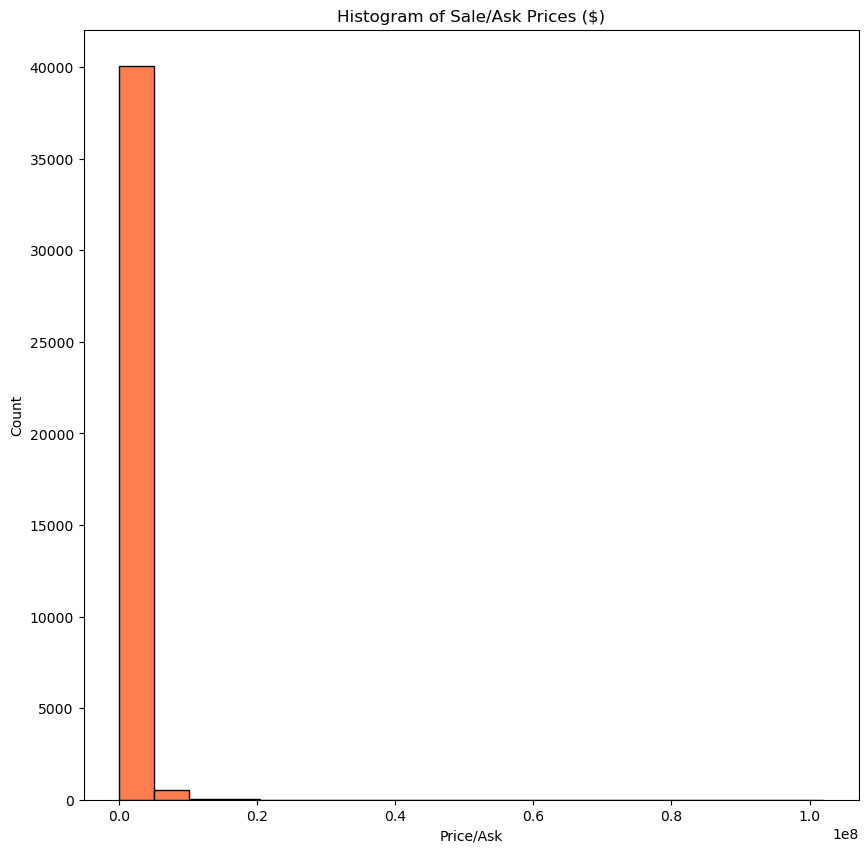

In [191]:
plt.figure(figsize=(10,10))
plt.hist(df['SALE / ASK'], 
         bins=20, 
         color='coral',
         edgecolor='black')
plt.xticks()
plt.xlabel('Price/Ask')
plt.ylabel('Count')
plt.title('Histogram of Sale/Ask Prices ($)')
plt.show()

The vast majority of the sales are below $10,000,000.

In [187]:
.1e8

10000000.0

What about for sales below $10,000,000?

In [188]:
# filter the dataset
b10m=df[df['SALE / ASK']<0.1e8]

# check
b10m['SALE / ASK'].describe()

count    4.058900e+04
mean     1.361563e+06
std      1.037202e+06
min      0.000000e+00
25%      7.500000e+05
50%      1.100000e+06
75%      1.611989e+06
max      9.907500e+06
Name: SALE / ASK, dtype: float64

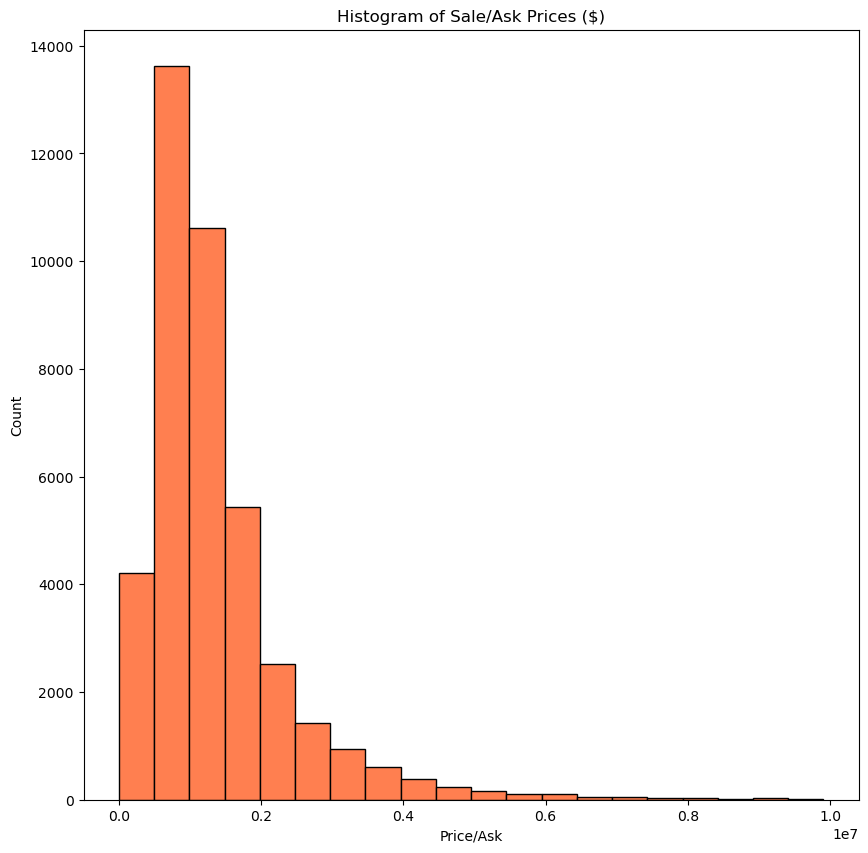

In [190]:
plt.figure(figsize=(10,10))
plt.hist(b10m['SALE / ASK'], 
         bins=20, 
         color='coral',
         edgecolor='black')
plt.xticks()
plt.xlabel('Price/Ask')
plt.ylabel('Count')
plt.title('Histogram of Sale/Ask Prices ($)')
plt.show()

Next plot example is below:

In [ ]:
# make a bar plot for all but location

plt.subplots(5,2,figsize = (15,15))

for index, col in enumerate(df.select_dtypes('object').columns[:-1]):
    
    plt.subplot(5,2,index + 1)
    df[col].value_counts().sort_values(ascending = False).plot(kind = 'barh',color = 'cornflowerblue')
    plt.title(f"row count {col} status")
    

plt.tight_layout()
plt.show()